In [ ]:
# Preload the interleaf data 
import pandas as pd
df = pd.read_json('/home/ubuntu/latest_llava/LLaVA/playground/data/steer_sft_model/training/interleaf_helpsteer_on_llava_lrv/extracted_attributes_sft_helpsteer_lrv3067llava3067-likert-1222_interleaved.json')

In [2]:
# Check if Ouput is same as convesations


In [14]:
grouped = df.groupby('image')
filtered_df = grouped.filter(lambda x: len(x) == 4)
len(filtered_df), len(df)

(20632, 24536)

In [18]:
# Assuming df is your original DataFrame
new_rows = []

# Group the DataFrame by 'image'
for image, group in df.groupby('image'):
    # Calculate the sum of 'Helpfulness', 'Correctness', and 'Coherence' for each candidate response
    group['sum'] = group['Helpfulness'] + group['Correctness'] + group['Coherence']
    
    group = group[group['Source'].isin(['CandidateResponseA', 'CandidateResponseB'])].copy()
    # Select the candidate response with the highest sum
    highest_sum_response = group.loc[group['sum'].idxmax()]
    
    # Filter for the rest of the responses that are at least 2 points smaller in the sum
    filtered_responses = group.loc[group['sum'] < highest_sum_response['sum'] - 2]
    
    # If the filtered candidate response is empty, continue
    if filtered_responses.empty:
        continue
    
    # Randomly sample 1 from the filtered responses
    selected_response = filtered_responses.sample(1).iloc[0]
    
    # Create a new row with the selected candidate response and the higher quality one
    new_row = {
        'image': image,
        'GPT4V_question_and_response': highest_sum_response['conversations'],  # Add 'conversations' column
        'GPT4V_response': highest_sum_response['Output'],
        'Candidate_question_and_response': selected_response['conversations'],  # Add 'conversations' column
        'Candidate_response': selected_response['Output'],
        'Helpfulness_gpt4v': highest_sum_response['Helpfulness'],
        'Correctness_gpt4v': highest_sum_response['Correctness'],
        'Coherence_gpt4v': highest_sum_response['Coherence'],
        'Sum_of_helpfulness_correctness_coherence_gpt4v': highest_sum_response['sum'],
        'Complexity_gpt4v': highest_sum_response['Complexity'],
        'Verbosity_gpt4v': highest_sum_response['Verbosity'],
        'Helpfulness_candidate': selected_response['Helpfulness'],
        'Correctness_candidate': selected_response['Correctness'],
        'Coherence_candidate': selected_response['Coherence'],
        'Sum_of_helpfulness_correctness_coherence_candidate': selected_response['sum'],
        'Complexity_candidate': selected_response['Complexity'],
        'Verbosity_candidate': selected_response['Verbosity'],
    }
    
    new_rows.append(new_row)

new_df = pd.DataFrame(new_rows)
sum_attributes = ['Sum_of_helpfulness_correctness_coherence_gpt4v', 
 'Sum_of_helpfulness_correctness_coherence_candidate']
new_df[sum_attributes].describe()

,Sum_of_helpfulness_correctness_coherence_gpt4v,Sum_of_helpfulness_correctness_coherence_candidate
count,1888.000000,1888.00000
mean,9.121292,4.48411
std,2.251211,2.41084
min,3.000000,0.00000
25%,7.000000,3.00000
50%,9.000000,4.00000
75%,11.000000,6.00000
max,12.000000,9.00000


In [4]:
#### GPT-4 vs Candidate Response ####

import pandas as pd
import numpy as np

# Assuming df is your original DataFrame
new_rows = []

# Group the DataFrame by 'image'
for image, group in df.groupby('image'):
    # Find the 'GPT4V_response' and candidate responses within this group
    gpt4v_response = group[group['Source'] == 'GPT4V_response'].iloc[0]
    candidate_responses = group[group['Source'].isin(['CandidateResponseA', 'CandidateResponseB'])]
    
    # If there are no candidate responses, skip this group
    if candidate_responses.empty:
        continue
    
    # Randomly select one of the candidate responses
    candidate_response = candidate_responses.sample(1).iloc[0]

    # Calculate the difference in the total sum of 'Helpfulness', 'Correctness', and 'Coherence'
    diff = abs((gpt4v_response['Helpfulness'] + gpt4v_response['Correctness'] + gpt4v_response['Coherence']) -
               (candidate_response['Helpfulness'] + candidate_response['Correctness'] + candidate_response['Coherence']))
    
    # If the difference is too small, skip this group
    if diff < 2:  # Define your threshold
        continue
    
    # Create a new row with the 'GPT4V_response' and the selected candidate response
    new_row = {
        'image': image,
        'GPT4V_question_and_response': gpt4v_response['conversations'],  # Add 'conversations' column
        'GPT4V_response': gpt4v_response['Output'],
        'Candidate_question_and_response': candidate_response['conversations'],  # Add 'conversations' column
        'Candidate_response': candidate_response['Output'],
        'Helpfulness_gpt4v': gpt4v_response['Helpfulness'],
        'Correctness_gpt4v': gpt4v_response['Correctness'],
        'Coherence_gpt4v': gpt4v_response['Coherence'],
        'Sum_of_helpfulness_correctness_coherence_gpt4v': gpt4v_response['Helpfulness'] + gpt4v_response['Correctness'] + gpt4v_response['Coherence'],
        'Complexity_gpt4v': gpt4v_response['Complexity'],
        'Verbosity_gpt4v': gpt4v_response['Verbosity'],
        'Helpfulness_candidate': candidate_response['Helpfulness'],
        'Correctness_candidate': candidate_response['Correctness'],
        'Coherence_candidate': candidate_response['Coherence'],
        'Sum_of_helpfulness_correctness_coherence_candidate': candidate_response['Helpfulness'] + candidate_response['Correctness'] + candidate_response['Coherence'],
        'Complexity_candidate': candidate_response['Complexity'],
        'Verbosity_candidate': candidate_response['Verbosity'],
    }
    
    new_rows.append(new_row)

new_df = pd.DataFrame(new_rows)
sum_attributes = ['Sum_of_helpfulness_correctness_coherence_gpt4v', 
 'Sum_of_helpfulness_correctness_coherence_candidate']
new_df[sum_attributes].describe()

,Sum_of_helpfulness_correctness_coherence_gpt4v,Sum_of_helpfulness_correctness_coherence_candidate
count,4587.000000,4587.000000
mean,11.926313,6.538914
std,0.446211,2.615321
min,0.000000,0.000000
25%,12.000000,4.000000
50%,12.000000,7.000000
75%,12.000000,9.000000
max,12.000000,12.000000


In [5]:
IMAGE_FOLDER='/home/ubuntu/train2017'
import matplotlib.pyplot as plt
from PIL import Image
import os

def display(img_filename):
    img_path = os.path.join(IMAGE_FOLDER, img_filename)
    image = Image.open(img_path).convert('RGB')
    plt.figure(figsize=(10, 10))
    plt.imshow(image)
    plt.axis('off')
    plt.show()

In [6]:
# Display the image 
IMAGE_FOLDER='/home/ubuntu/train2017'
import matplotlib.pyplot as plt
from PIL import Image
import os

def display(img_filename):
    img_path = os.path.join(IMAGE_FOLDER, img_filename)
    image = Image.open(img_path).convert('RGB')
    plt.figure(figsize=(10, 10))
    plt.imshow(image)
    plt.axis('off')
    plt.show()


In [7]:
from typing import List, Tuple, Union, Optional
def extract_question_turn(conversations: List[dict]) -> dict:
    """Extract the question turn from a list of turns in a conversation."""
    question_turn = conversations[0]
    assert question_turn['from'] == 'human'
    question_str = question_turn['value']
    if '\nPlease answer' in question_str:
        question_str = question_str.split('\nPlease answer')[0]
    return {'from': 'human', 'value': question_str}


def extract_answer_turn_to_match_Output(conversations: List[dict]) -> dict:
    """Extract the question turn from a list of turns in a conversation."""
    answer_turn = conversations[1]
    assert answer_turn['from'] == 'gpt'
    return answer_turn['value']
assert new_df['GPT4V_question_and_response'].apply(lambda x: extract_answer_turn_to_match_Output(x)).equals(new_df['GPT4V_response'])
assert new_df['Candidate_question_and_response'].apply(lambda x: extract_answer_turn_to_match_Output(x)).equals(new_df['Candidate_response'])

new_df['GPT4V_question'] = new_df['GPT4V_question_and_response'].apply(lambda x: extract_question_turn(x))
new_df['Candidate_question'] = new_df['Candidate_question_and_response'].apply(lambda x: extract_question_turn(x))
if not new_df['GPT4V_question'].equals(new_df['Candidate_question']): 
    print('GPT4V_question and Candidate_question are not equal, filtering')
    print('Number of rows before filtering: ', len(new_df))
    new_df = new_df[(new_df['GPT4V_question']) == (new_df['Candidate_question'])]
    print('Number of rows after filtering: ', len(new_df))

new_df['question'] = new_df['GPT4V_question']
del new_df['GPT4V_question']
del new_df['Candidate_question']

new_df['chosen'] = new_df['GPT4V_response']
new_df['rejected'] = new_df['Candidate_response']

GPT4V_question and Candidate_question are not equal, filtering
Number of rows before filtering:  4587
Number of rows after filtering:  4383


In [8]:
intermediate_csv = '/home/ubuntu/latest_llava/LLaVA/playground/data/dpo/interleaf6k_filtered__4406images_atleast2_in_sum_quality_for_dpo_inference.csv'

new_df.to_csv(intermediate_csv)

In [ ]:
import torch
import os
import json
import pandas as pd
from tqdm import tqdm
import shortuuid

from llava.constants import IMAGE_TOKEN_INDEX, DEFAULT_IMAGE_TOKEN, DEFAULT_IM_START_TOKEN, DEFAULT_IM_END_TOKEN
from llava.conversation import conv_templates, SeparatorStyle
from llava.model.builder import load_pretrained_model
from llava.utils import disable_torch_init
from llava.mm_utils import tokenizer_image_token, process_images, load_image_from_base64, get_model_name_from_path
from llava.train.train import preference_collator_fn
from functools import partial
import tqdm
from llava.train.llava_trainer import get_batch_logps
from PIL import Image
import math
disable_torch_init()
model_path = '/home/ubuntu/latest_llava/LLaVA/checkpoints/llava-v1.5-7b-lora-pure-sft-1.5lrv-2kllava-1230-merged'
model_name = get_model_name_from_path(model_path)
tokenizer, model, image_processor, context_len = load_pretrained_model(model_path, None, model_name)

use_im_start_end= False # Default setting from llava 1.5 

IMAGE_FOLDER="/home/ubuntu/latest_llava/llava_1dot5data/coco/train2017/"
inference_data_path = intermediate_csv
output_path = intermediate_csv.split('csv')[0] + 'with_logp.json'
from llava.train.train import encode_multimodal_preference_sample
import torch.utils.data as torch_data

class PreferenceInferenceDataset(torch_data.Dataset):
    def __init__(self,
                 data_path,
                 tokenizer,
                 img_processor,
                 use_im_start_end):
        self.data = pd.read_csv(data_path)

        self.mm_cfg = {
            'image_processor': img_processor,
            'is_multimodal': True,
            # 'image_token_len': image_token_len, # TODO check if needed
            'use_im_start_end': use_im_start_end,
            'image_aspect_ratio': 'pad'
        }
        self.tokenizer = tokenizer

    def __getitem__(self, index):
        # After encode multimodal preference sample, 
        # the image would ahve the pixel values values
        sample = self.convert_dataframe_row_to_source(self.data.iloc[index])
        rej_data_dict, win_data_dict = encode_multimodal_preference_sample(sample, self.tokenizer, self.mm_cfg)
        return rej_data_dict, win_data_dict
    
    def _get_image(self, img_filename):
        img_path = os.path.join(IMAGE_FOLDER, img_filename)
        image = Image.open(img_path).convert('RGB')
        return image
    

    def _convert_to_llava_answer_turn(self, answer):
        return {"from": "gpt", "value": answer}

    def convert_dataframe_row_to_source(self, row):
        dict_output = {'question': row['question'], 
                       # Chosen and rejected based on the sum of the first three quality score
                    'chosen': self._convert_to_llava_answer_turn(row['chosen']),
                    'rejected': self._convert_to_llava_answer_turn(row['rejected']),
                    'image': self._get_image(row['image'])}
        return dict_output

    def __len__(self):
        return len(self.data)
    
preference_torch_dataset = PreferenceInferenceDataset(inference_data_path,
                           tokenizer=tokenizer,
                           img_processor=image_processor,
                           use_im_start_end=False)
preference_torch_dataset[0]

dataset = preference_torch_dataset
collate_fn = partial(preference_collator_fn, pad_token_id=tokenizer.pad_token_id)
dataloader = torch_data.DataLoader(dataset, batch_size=1, collate_fn=collate_fn,
                                    num_workers=5, shuffle=False)
win_logp_list = []
rej_logp_list = []

win_avg_logp_list = []
rej_avg_logp_list = []

win_per_token_logp_list = []
rej_per_token_logp_list = []

with torch.inference_mode():
    for batch in tqdm.tqdm(dataloader):
        for key in ['win', 'rej']:
            input_ids = batch[f'{key}_input_ids'].cuda()
            labels = batch[f'{key}_labels'].cuda()
            attention_mask = batch[f'{key}_attention_mask'].cuda()

            output = model(
                input_ids=input_ids,
                labels=labels,
                attention_mask=attention_mask,
                images=batch['images'].half().cuda()
            )
            per_token_logp, log_prob, average_log_prob = get_batch_logps(output.logits, labels, return_all=True)

            # print(per_token_logp.shape, input_ids.shape, labels.shape, flush=True)
            assert per_token_logp.size(1) >= input_ids.size(1) - 1
            per_token_logp = per_token_logp.tolist()
            # per_token_logp = [x[:input_ids[i].ne(tokenizer.pad_token_id).sum().item()] for i, x in enumerate(per_token_logp)]
            log_prob = log_prob.tolist()
            average_log_prob = average_log_prob.tolist()

            if key == 'win':
                win_logp_list += log_prob
                win_avg_logp_list += average_log_prob
                win_per_token_logp_list += per_token_logp
            else:
                rej_logp_list += log_prob
                rej_avg_logp_list += average_log_prob
                rej_per_token_logp_list += per_token_logp
            # print(f'{key} logits in {output.logits.shape}, logp in {log_prob.shape} avg_logp in {average_log_prob.shape}')

df = pd.read_csv(inference_data_path)
def _convert_to_llava_answer_turn(answer):
    return {"from": "gpt", "value": answer}
# Add each list as a column to the dataframe with its variable name
df['win_logp'] = win_logp_list
df['rej_logp'] = rej_logp_list
df['win_avg_logp'] = win_avg_logp_list
df['rej_avg_logp'] = rej_avg_logp_list
df['win_per_token_logp'] = win_per_token_logp_list
df['rej_per_token_logp'] = rej_per_token_logp_list
exisitng_columns = ['rej_logp', 
                    'win_logp',
                    'rej_avg_logp',
                    'win_avg_logp',
                    'rej_per_token_logp',
                    'win_per_token_logp']
for col in exisitng_columns:
    rename = 'ref_' + col
    df[rename] = df[col]
    del df[col]
df['chosen'] = df['chosen'].apply(_convert_to_llava_answer_turn)
df['rejected'] = df['rejected'].apply(_convert_to_llava_answer_turn)
# df.to_json(output_path, orient='records')

In [12]:
output_path

'/home/ubuntu/latest_llava/LLaVA/playground/data/dpo/interleaf6k_filtered__4406images_atleast2_in_sum_quality_for_dpo_inference.with_logp.json'

In [11]:
df.to_json(output_path, orient='records')

In [19]:
next(iter(preference_torch_dataset))

FileNotFoundError: [Errno 2] No such file or directory: 'IMAGE_FOLDER=/home/ubuntu/latest_llava/llava_1dot5data/coco/train2017/000000000092.jpg'

In [2]:
intermediate_csv = '/home/ubuntu/LLaVA/playground/data/dpo/interleaf6k_filtered__4406images_atleast2_in_sum_quality_for_dpo_inference.csv'
inference_data_path = intermediate_csv
output_path = intermediate_csv.split('csv')[0] + 'with_logp.json'
df_reload = pd.read_json(output_path)

Text(0.5, 1.0, 'llava 1.5 13b log p for sampled response and gpt4v response')

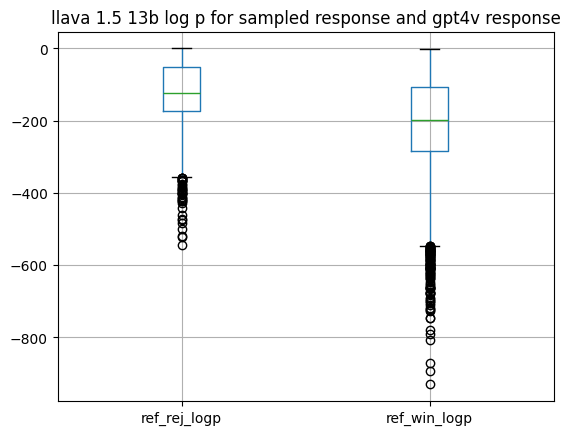

In [7]:
df_reload[['ref_rej_logp', 'ref_win_logp']].boxplot()
import matplotlib.pyplot as plt
plt.title('llava 1.5 13b log p for sampled response and gpt4v response')

# Samee code but for extracting log prob from DPO'ed model

In [28]:
import torch
import os
import json
import pandas as pd
from tqdm import tqdm
import shortuuid

from llava.constants import IMAGE_TOKEN_INDEX, DEFAULT_IMAGE_TOKEN, DEFAULT_IM_START_TOKEN, DEFAULT_IM_END_TOKEN
from llava.conversation import conv_templates, SeparatorStyle
from llava.model.builder import load_pretrained_model
from llava.utils import disable_torch_init
from llava.mm_utils import tokenizer_image_token, process_images, load_image_from_base64, get_model_name_from_path
from llava.train.train import preference_collator_fn
from functools import partial
import tqdm
from llava.train.llava_trainer import get_batch_logps
from PIL import Image
import math
disable_torch_init()
model_path = '/home/ubuntu/LLaVA/checkpoints/llava-v1.5-13b-steer-lora-helpsteerformat-interleaf-lrv3067llava3067-likert-1222_interleavedgpt4v_responseonly-pure'
model_base = '/home/ubuntu/LLaVA/checkpoints/llava-v1.5-13b'
model_name = get_model_name_from_path(model_path)
tokenizer, model, image_processor, context_len = load_pretrained_model(
    model_path, model_base, model_name)

use_im_start_end= False # Default setting from llava 1.5 

IMAGE_FOLDER='/home/ubuntu/train2017'
inference_data_path = intermediate_csv
output_path = intermediate_csv.split('csv')[0] + 'with_logp.json'
from llava.train.train import encode_multimodal_preference_sample
import torch.utils.data as torch_data

class PreferenceInferenceDataset(torch_data.Dataset):
    def __init__(self,
                 data_path,
                 tokenizer,
                 img_processor,
                 use_im_start_end):
        self.data = pd.read_csv(data_path)

        self.mm_cfg = {
            'image_processor': img_processor,
            'is_multimodal': True,
            # 'image_token_len': image_token_len, # TODO check if needed
            'use_im_start_end': use_im_start_end,
            'image_aspect_ratio': 'pad'
        }
        self.tokenizer = tokenizer

    def __getitem__(self, index):
        # After encode multimodal preference sample, 
        # the image would ahve the pixel values values
        sample = self.convert_dataframe_row_to_source(self.data.iloc[index])
        rej_data_dict, win_data_dict = encode_multimodal_preference_sample(sample, self.tokenizer, self.mm_cfg)
        return rej_data_dict, win_data_dict
    
    def _get_image(self, img_filename):
        img_path = os.path.join(IMAGE_FOLDER, img_filename)
        image = Image.open(img_path).convert('RGB')
        return image
    

    def _convert_to_llava_answer_turn(self, answer):
        return {"from": "gpt", "value": answer}

    def convert_dataframe_row_to_source(self, row):
        dict_output = {'question': row['question'], 
                       # Chosen and rejected based on the sum of the first three quality score
                    'chosen': self._convert_to_llava_answer_turn(row['chosen']),
                    'rejected': self._convert_to_llava_answer_turn(row['rejected']),
                    'image': self._get_image(row['image'])}
        return dict_output

    def __len__(self):
        return len(self.data)
    
preference_torch_dataset = PreferenceInferenceDataset(inference_data_path,
                           tokenizer=tokenizer,
                           img_processor=image_processor,
                           use_im_start_end=False)
preference_torch_dataset[0]

dataset = preference_torch_dataset
collate_fn = partial(preference_collator_fn, pad_token_id=tokenizer.pad_token_id)
dataloader = torch_data.DataLoader(dataset, batch_size=1, collate_fn=collate_fn,
                                    num_workers=5, shuffle=False)
win_logp_list = []
rej_logp_list = []

win_avg_logp_list = []
rej_avg_logp_list = []

win_per_token_logp_list = []
rej_per_token_logp_list = []

with torch.inference_mode():
    for batch in tqdm.tqdm(dataloader):
        for key in ['win', 'rej']:
            input_ids = batch[f'{key}_input_ids'].cuda()
            labels = batch[f'{key}_labels'].cuda()
            attention_mask = batch[f'{key}_attention_mask'].cuda()

            output = model(
                input_ids=input_ids,
                labels=labels,
                attention_mask=attention_mask,
                images=batch['images'].half().cuda()
            )
            per_token_logp, log_prob, average_log_prob = get_batch_logps(output.logits, labels, return_all=True)

            # print(per_token_logp.shape, input_ids.shape, labels.shape, flush=True)
            assert per_token_logp.size(1) >= input_ids.size(1) - 1
            per_token_logp = per_token_logp.tolist()
            # per_token_logp = [x[:input_ids[i].ne(tokenizer.pad_token_id).sum().item()] for i, x in enumerate(per_token_logp)]
            log_prob = log_prob.tolist()
            average_log_prob = average_log_prob.tolist()

            if key == 'win':
                win_logp_list += log_prob
                win_avg_logp_list += average_log_prob
                win_per_token_logp_list += per_token_logp
            else:
                rej_logp_list += log_prob
                rej_avg_logp_list += average_log_prob
                rej_per_token_logp_list += per_token_logp
            # print(f'{key} logits in {output.logits.shape}, logp in {log_prob.shape} avg_logp in {average_log_prob.shape}')

df = pd.read_csv(inference_data_path)
def _convert_to_llava_answer_turn(answer):
    return {"from": "gpt", "value": answer}
# Add each list as a column to the dataframe with its variable name
df['win_logp'] = win_logp_list
df['rej_logp'] = rej_logp_list
df['win_avg_logp'] = win_avg_logp_list
df['rej_avg_logp'] = rej_avg_logp_list
df['win_per_token_logp'] = win_per_token_logp_list
df['rej_per_token_logp'] = rej_per_token_logp_list
exisitng_columns = ['rej_logp', 
                    'win_logp',
                    'rej_avg_logp',
                    'win_avg_logp',
                    'rej_per_token_logp',
                    'win_per_token_logp']
for col in exisitng_columns:
    rename = 'ref_' + col
    df[rename] = df[col]
    del df[col]
df['chosen'] = df['chosen'].apply(_convert_to_llava_answer_turn)
df['rejected'] = df['rejected'].apply(_convert_to_llava_answer_turn)
# df.to_json(output_path, orient='records')

Loading LLaVA from base model...


Loading checkpoint shards:   0%|          | 0/3 [00:00<?, ?it/s]

Loading checkpoint shards: 100%|██████████| 3/3 [00:05<00:00,  1.81s/it]


Loading additional LLaVA weights...
Loading LoRA weights...
Merging LoRA weights...
Model is loaded...
.....Loading vision tower and image processor...


100%|██████████| 4406/4406 [09:14<00:00,  7.94it/s]


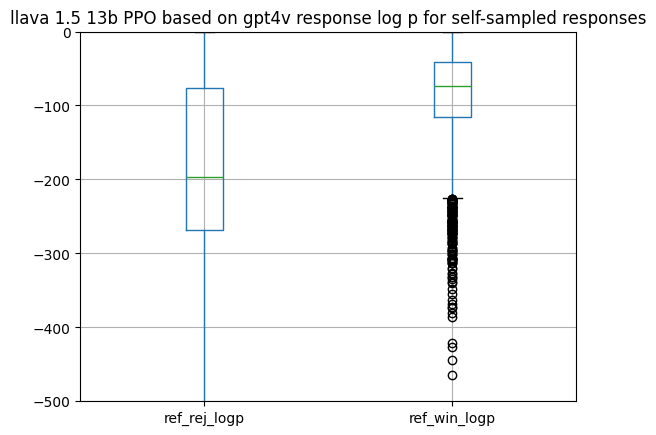

In [29]:
df[['ref_rej_logp', 'ref_win_logp']].boxplot()
plt.title('llava 1.5 13b PPO based on gpt4v response log p for self-sampled responses')
plt.ylim(-500, 0)
plt.show()


# Old draft below

In [8]:
import torch
import os
import json
import pandas as pd
from tqdm import tqdm
import shortuuid

from llava.constants import IMAGE_TOKEN_INDEX, DEFAULT_IMAGE_TOKEN, DEFAULT_IM_START_TOKEN, DEFAULT_IM_END_TOKEN
from llava.conversation import conv_templates, SeparatorStyle
from llava.model.builder import load_pretrained_model
from llava.utils import disable_torch_init
from llava.mm_utils import tokenizer_image_token, process_images, load_image_from_base64, get_model_name_from_path

from PIL import Image
import math
disable_torch_init()
model_path = '/home/ubuntu/LLaVA/checkpoints/llava-v1.5-13b'
model_name = get_model_name_from_path(model_path)
tokenizer, model, image_processor, context_len = load_pretrained_model(model_path, None, model_name)

Loading checkpoint shards: 100%|██████████| 3/3 [00:06<00:00,  2.06s/it]


.....Loading vision tower and image processor...


In [9]:
use_im_start_end= False # Default setting from llava 1.5 

IMAGE_FOLDER='/home/ubuntu/train2017'


In [10]:
# Inspect previous setup

df_muffin_tsv = '/home/ubuntu/muffin/data/RLHF-V-Hall_v0/RLHF-V-Hall_v0-1837.tsv'
df = pd.read_csv(df_muffin_tsv, sep='\t')

In [11]:
from llava.train.train import encode_multimodal_preference_sample
import torch.utils.data as torch_data

class PreferenceInferenceDataset(torch_data.Dataset):
    def __init__(self,
                 data_path,
                 tokenizer,
                 img_processor,
                 use_im_start_end):
        self.data = pd.read_csv(data_path, sep='\t')

        self.mm_cfg = {
            'image_processor': img_processor,
            'is_multimodal': True,
            # 'image_token_len': image_token_len, # TODO check if needed
            'use_im_start_end': use_im_start_end,
            'image_aspect_ratio': 'pad'
        }
        self.tokenizer = tokenizer

    def __getitem__(self, index):
        # After encode multimodal preference sample, 
        # the image would ahve the pixel values values
        sample = self.convert_dataframe_row_to_source(self.data.iloc[index])
        rej_data_dict, win_data_dict = encode_multimodal_preference_sample(sample, self.tokenizer, self.mm_cfg)
        return rej_data_dict, win_data_dict
    
    def _get_image(self, img_filename):
        img_path = os.path.join(IMAGE_FOLDER, img_filename)
        image = Image.open(img_path).convert('RGB')
        return image
    

    def _convert_to_llava_answer_turn(self, answer):
        return {"from": "gpt", "value": answer}

    def convert_dataframe_row_to_source(self, row):
        dict_output = {'question': row['question'], 
                       # Chosen and rejected based on the sum of the first three quality score
                    'chosen': self._convert_to_llava_answer_turn(row['chosen']),
                    'rejected': self._convert_to_llava_answer_turn(row['rejected']),
                    'image': self._get_image(row['image'])}
        return dict_output

    def __len__(self):
        return len(self.data)
    
preference_torch_dataset = PreferenceInferenceDataset('/home/ubuntu/muffin/data/RLHF-V-Hall_v0/RLHF-V-Hall_v0-1837.tsv',
                           tokenizer=tokenizer,
                           img_processor=image_processor,
                           use_im_start_end=False)
preference_torch_dataset[0]

({'input_ids': tensor([    1,   319, 13563,  1546,   263, 12758,  1404,   322,   385, 23116,
          21082, 20255, 29889,   450, 20255,  4076,  8444, 29892, 13173, 29892,
            322,  1248,   568,  6089,   304,   278,  1404, 29915, 29879,  5155,
          29889,  3148,  1001, 29901,   529,  3027, 29958,    13, 11008,   338,
            445,  6808,   814,  5929, 12818,   304,  4856,   411,   263, 14225,
            304,   720, 29973,   319,  1799,  9047, 13566, 29901,   450,  6808,
            814,   297,   278,  1967, 29892,   607,  5680,   263,  8424,   310,
            274,  1296, 10664,   297,   377, 16242,   907,   314,   322,   521,
            542, 23167,   528,   485,   886, 29892,   723,   367, 10712,  5929,
          12818,   304,  4856,   411,   263, 14225,   304,   720, 29889,   910,
            338,  1363,   278,   274,  1296,  3528,  5692,   304,   367,   263,
           8261,   322, 29156,  5362,  7539, 29892,  1754,  1584,   901,   875,
          18499,   491,   2

In [12]:
preference_torch_dataset.mm_cfg['image_aspect_ratio']

'pad'

In [13]:
def _convert_to_llava_answer_turn(self, answer):
    return {"from": "gpt", "value": answer}

torch.Size([3, 336, 336])

In [14]:
preference_torch_dataset[0][0]['input_ids'].shape

torch.Size([226])

In [ ]:
from llava.train.train import preference_collator_fn
from functools import partial
import tqdm
from llava.train.llava_trainer import get_batch_logps
dataset = preference_torch_dataset
collate_fn = partial(preference_collator_fn, pad_token_id=tokenizer.pad_token_id)
dataloader = torch_data.DataLoader(dataset, batch_size=1, collate_fn=collate_fn,
                                    num_workers=5, shuffle=False)
win_logp_list = []
rej_logp_list = []

win_avg_logp_list = []
rej_avg_logp_list = []

win_per_token_logp_list = []
rej_per_token_logp_list = []

with torch.inference_mode():
    for batch in tqdm.tqdm(dataloader):
        for key in ['win', 'rej']:
            input_ids = batch[f'{key}_input_ids'].cuda()
            labels = batch[f'{key}_labels'].cuda()
            attention_mask = batch[f'{key}_attention_mask'].cuda()

            output = model(
                input_ids=input_ids,
                labels=labels,
                attention_mask=attention_mask,
                images=batch['images'].half().cuda()
            )
            per_token_logp, log_prob, average_log_prob = get_batch_logps(output.logits, labels, return_all=True)

            # print(per_token_logp.shape, input_ids.shape, labels.shape, flush=True)
            assert per_token_logp.size(1) >= input_ids.size(1) - 1
            per_token_logp = per_token_logp.tolist()
            # per_token_logp = [x[:input_ids[i].ne(tokenizer.pad_token_id).sum().item()] for i, x in enumerate(per_token_logp)]
            log_prob = log_prob.tolist()
            average_log_prob = average_log_prob.tolist()

            if key == 'win':
                win_logp_list += log_prob
                win_avg_logp_list += average_log_prob
                win_per_token_logp_list += per_token_logp
            else:
                rej_logp_list += log_prob
                rej_avg_logp_list += average_log_prob
                rej_per_token_logp_list += per_token_logp
            # print(f'{key} logits in {output.logits.shape}, logp in {log_prob.shape} avg_logp in {average_log_prob.shape}')

In [14]:
next(iter(dataloader))

AttributeError: Caught AttributeError in DataLoader worker process 0.
Original Traceback (most recent call last):
  File "/home/ubuntu/mambaforge-pypy3/envs/llava/lib/python3.10/site-packages/transformers/feature_extraction_utils.py", line 92, in __getattr__
    return self.data[item]
KeyError: 'shape'

During handling of the above exception, another exception occurred:

Traceback (most recent call last):
  File "/home/ubuntu/mambaforge-pypy3/envs/llava/lib/python3.10/site-packages/torch/utils/data/_utils/worker.py", line 308, in _worker_loop
    data = fetcher.fetch(index)
  File "/home/ubuntu/mambaforge-pypy3/envs/llava/lib/python3.10/site-packages/torch/utils/data/_utils/fetch.py", line 54, in fetch
    return self.collate_fn(data)
  File "/home/ubuntu/LLaVA/llava/train/train.py", line 808, in preference_collator_fn
    rej_batch = SFT_collator_fn(rej_instances, pad_token_id)
  File "/home/ubuntu/LLaVA/llava/train/train.py", line 789, in SFT_collator_fn
    if all(x is not None and x.shape == images[0].shape for x in images):
  File "/home/ubuntu/LLaVA/llava/train/train.py", line 789, in <genexpr>
    if all(x is not None and x.shape == images[0].shape for x in images):
  File "/home/ubuntu/mambaforge-pypy3/envs/llava/lib/python3.10/site-packages/transformers/feature_extraction_utils.py", line 94, in __getattr__
    raise AttributeError
AttributeError


In [15]:
%debug

> /home/ubuntu/mambaforge-pypy3/envs/llava/lib/python3.10/site-packages/torch/_utils.py(644)reraise()
    642             # instantiate since we don't know how to
    643             raise RuntimeError(msg) from None
--> 644         raise exception
    645 
    646 

*** NameError: name 'images' is not defined
> /home/ubuntu/mambaforge-pypy3/envs/llava/lib/python3.10/site-packages/torch/utils/data/dataloader.py(1371)_process_data()
   1369         self._try_put_index()
   1370         if isinstance(data, ExceptionWrapper):
-> 1371             data.reraise()
   1372         return data
   1373 

*** NameError: name 'images' is not defined
*** Invalid frame count (')
> /home/ubuntu/mambaforge-pypy3/envs/llava/lib/python3.10/site-packages/torch/utils/data/dataloader.py(1345)_next_data()
   1343             else:
   1344                 del self._task_info[idx]
-> 1345                 return self._process_data(data)
   1346 
   1347     def _try_put_index(self):

> /home/ubuntu/mambaforge-